### Libraries

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### Loading Data

In [81]:
df = pd.read_csv('data.csv')
df.head(5)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [83]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe has 251079 rows and 15 columns


### Data  Understanding

#### Converting to correct type

*Column Year*
There are some string values in this column, and we are going to keep only those values that contain years.

In [84]:
for i in df.year.unique().tolist():
  if not  i.isnumeric():
      print(i)

Petrol
Automatic
Manual
Diesel
04/2017
Electric
12/2003
05/2017
04/2006
LPG
8.000 km
113.000 km
32.250 km
02/2020
06/2021
07/2021
Hybrid
03/2023
01/2019
10/2010
280.000 km
03/2015
10/2016
06/2016
80.000 km
06/2018
09/2018
39.900 km
18.990 km
05/2023
04/2013
05/2015
05/2016
07/2018
12/2022
12/2020
05/2021
108.500 km
11/2018
33.150 km
12.520 km
15.180 km
6.500 km
64.500 km
03/2019
1.000 km
01/2023
02/2023
06/2023
11/2013
49.000 km
04/2023
03/2007
159.400 km
217.946 km
75.700 km
243.431 km
CNG


In [85]:
df = df[df['year'].str.isnumeric()]
df.year = df.year.astype(int)

*Column Price in Euro*
Same thing can be observed for the price column as well. So those rows, will be omitted.

In [86]:
for i in df.price_in_euro.unique().tolist():
  if not  i.isnumeric():
      print(i)

ROSTHREI
SHA
PGD
 NAVI


In [87]:
df = df[df['price_in_euro'].str.isnumeric()]
df.price_in_euro = df.price_in_euro.astype(int)

*Column Power KW and Power PS*

In [88]:
df.power_kw = df.power_kw.astype(float)
df.power_ps = df.power_ps.astype(float)

*Fuel consumption in litres/100km*

In [89]:
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].map(lambda x: str(x).split(' ')[0])

In [90]:
condition = (df['fuel_consumption_l_100km']=='-')
df.loc[condition, 'fuel_consumption_l_100km'] = np.nan

In [91]:
df.fuel_consumption_l_100km = df.fuel_consumption_l_100km.str.replace(",",".").astype(float)

In [92]:
df.loc[df['fuel_type'] == 'Electric', 'fuel_consumption_l_100km'] = 0


*Fuel consumption in g/ km*

In [93]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].map(lambda x: str(x).split(' ')[0])

In [94]:
condition = (df['fuel_consumption_g_km']=='-')
df.loc[condition, 'fuel_consumption_g_km'] = np.nan
condition2 = (df['fuel_consumption_g_km']=='-/-')
df.loc[condition2, 'fuel_consumption_g_km'] = np.nan


In [95]:
df.fuel_consumption_g_km = pd.to_numeric(df['fuel_consumption_g_km'], errors='coerce')

In [96]:
df.rename(columns={'Unnamed: 0': "ID"},inplace = True)

In [97]:
#checking the percent of missing value
missing_data_percentage=(df.isna().sum()/len(df))*100
missing_data_percentage

ID                           0.000000
brand                        0.000000
model                        0.000000
color                        0.066167
registration_date            0.000000
year                         0.000000
price_in_euro                0.000000
power_kw                     0.051020
power_ps                     0.051020
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km     8.954879
fuel_consumption_g_km       15.073740
mileage_in_km                0.024713
offer_description            0.000000
dtype: float64

### Visualizations

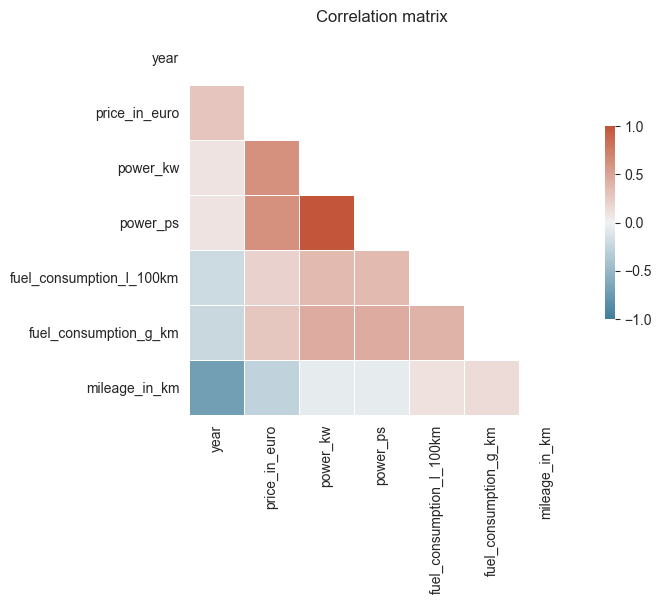

In [98]:
corr = df.loc[:, ~df.columns.isin(['ID','brand', 'model', 'color', 'transmission_type','fuel_type','offer_description'])].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation matrix")
plt.show()

In [99]:
def creating_box_hist(column, df):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_dis) = plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.20, .80)},figsize=(8, 5))
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode().tolist()[0]

    f.suptitle("Data distribution of  "+ column  , fontsize=10, fontweight='bold')
    # assigning a graph to each ax

    sns.boxplot(df[column], ax=ax_box,orient = 'h',showmeans = True)

    sns.despine(top=True,right=True,left=True)
    sns.histplot(df[column],kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})


In [100]:
creating_box_hist('year',df)


In [101]:
creating_box_hist('power_kw',df)

In [102]:
creating_box_hist('power_ps',df)

In [103]:
creating_box_hist('fuel_consumption_l_100km',df)

In [71]:
creating_box_hist('fuel_consumption_g_km',df)

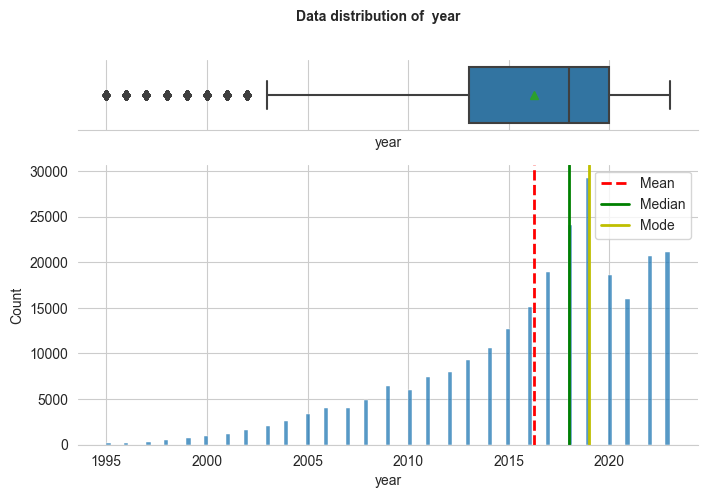

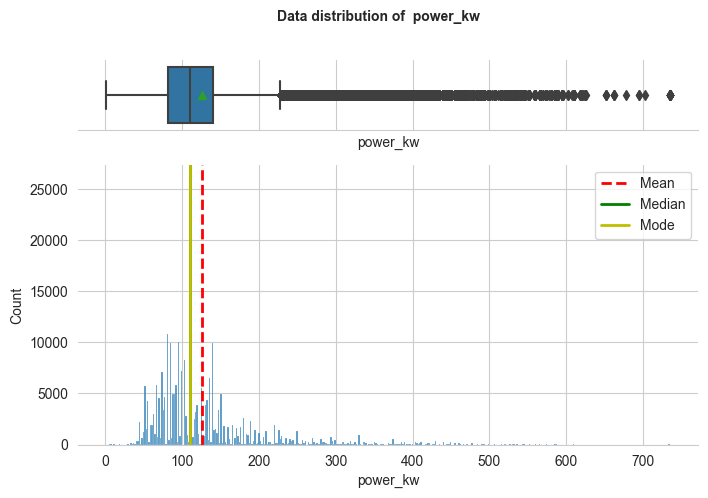

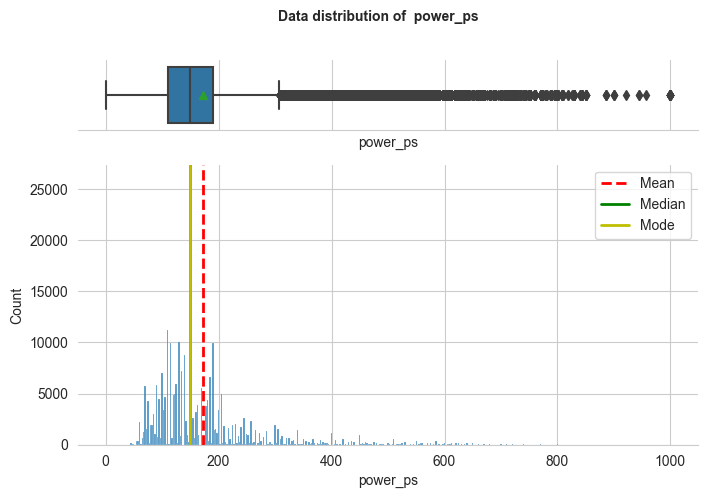

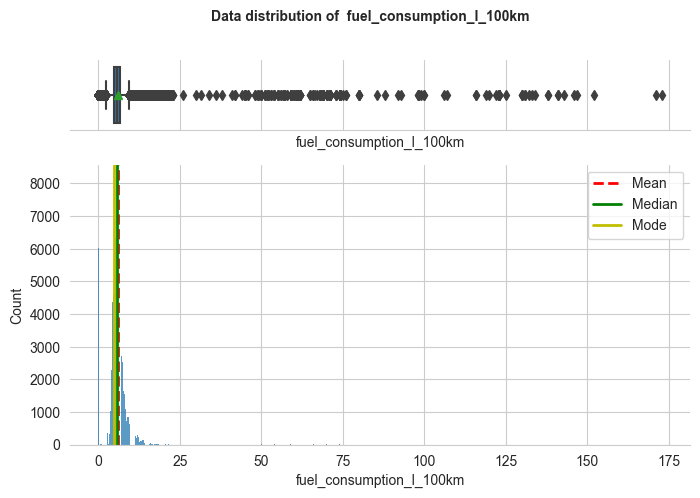

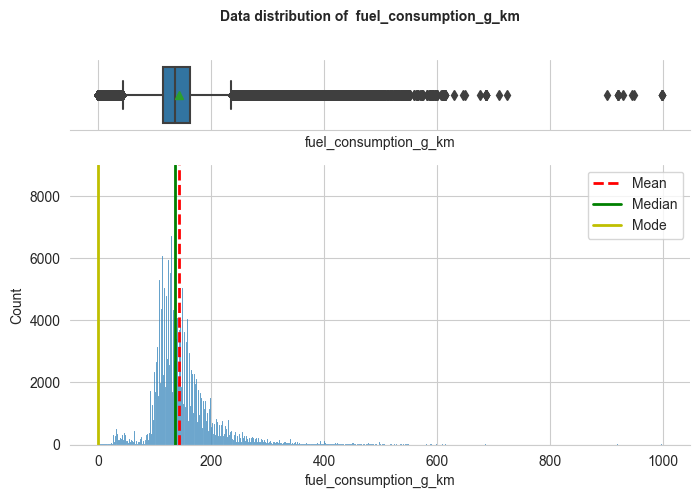

In [72]:
plt.show()

### Outliers

In [113]:
df[df['fuel_consumption_l_100km']>15]

,ID,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
367,367,alfa-romeo,Alfa Romeo 8C,white,03/2010,2010,249000,331.0,450.0,Semi-automatic,Petrol,16.8,379.0,29400.0,"Spider, limitierte Serie"
1442,1442,aston-martin,Aston Martin DB7,black,11/1998,1998,31900,228.0,310.0,Manual,Petrol,16.5,NaN,52000.0,DB 7 Volante
1449,1449,aston-martin,Aston Martin Vanquish,green,04/2002,2002,86500,345.0,469.0,Automatic,Petrol,16.7,419.0,38000.0,V12 -dt. Fzg. - KD neu -perfekt!
1450,1450,aston-martin,Aston Martin DB7,blue,06/2003,2003,64990,320.0,435.0,Manual,Petrol,18.8,469.0,22985.0,GT ab Werk als Handschalter!! Sehr selten!!
1451,1451,aston-martin,Aston Martin DB7,blue,01/2003,2003,67500,309.0,420.0,Automatic,Petrol,18.8,450.0,87186.0,"Vantage ,,Jubilee"", der 7. von nur 26!"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250568,250568,volvo,Volvo XC40,white,11/2021,2021,45780,192.0,261.0,Automatic,Hybrid,51.0,41.0,18806.0,T5 Recharge DKG RDesign
250736,250736,volvo,Volvo XC90,grey,04/2022,2022,67950,335.0,455.0,Automatic,Hybrid,22.6,34.0,38500.0,T8 AWD Recharge Inscription *Head-up*Standhzg*
250763,250763,volvo,Volvo XC40,red,12/2022,2022,46990,192.0,261.0,Automatic,Hybrid,46.0,42.0,500.0,T5 Recharge DKG Plus Dark
250909,250909,volvo,Volvo XC60,white,10/2022,2022,64990,257.0,349.0,Automatic,Hybrid,92.0,75.0,19000.0,T6 Recharge AWD Plus Dark +el.AHK+PANO+ SHD/LED


In [120]:
median_per_brand = df.groupby('brand')['fuel_consumption_l_100km'].median().reset_index()

In [121]:
df['fuel_consumption_l_100km'] = df.apply(lambda row: median_per_brand.loc[median_per_brand['brand'] == row['brand'], 'fuel_consumption_l_100km'].values[0]
                                           if row['fuel_consumption_l_100km'] > 15 else row['fuel_consumption_l_100km'], axis=1)

In [122]:
df.describe()

,ID,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,250880.000000,250880.000000,2.508800e+05,250752.000000,250752.000000,228414.000000,213063.000000,2.508180e+05
mean,125523.627212,2016.263166,2.613753e+04,126.221115,171.693618,5.883928,142.374123,8.536867e+04
std,72482.025442,5.463043,3.698795e+04,72.018901,97.890860,2.072506,60.872477,7.872133e+04
min,0.000000,1995.000000,1.200000e+02,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,62752.750000,2013.000000,1.199000e+04,82.000000,111.000000,4.900000,115.000000,2.495000e+04
50%,125513.500000,2018.000000,1.989000e+04,110.000000,150.000000,5.700000,135.000000,6.751500e+04
75%,188286.250000,2020.000000,2.995000e+04,140.000000,190.000000,6.700000,163.000000,1.265385e+05
max,251078.000000,2023.000000,5.890500e+06,735.000000,999.000000,15.000000,999.000000,3.800000e+06


In [123]:
creating_box_hist('fuel_consumption_l_100km',df)

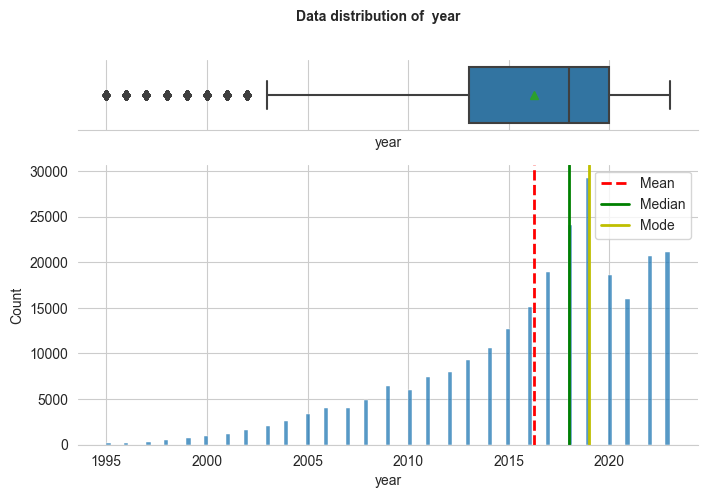

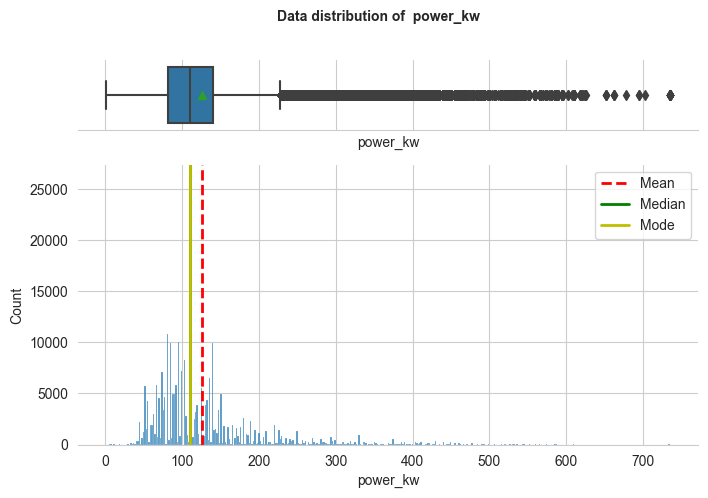

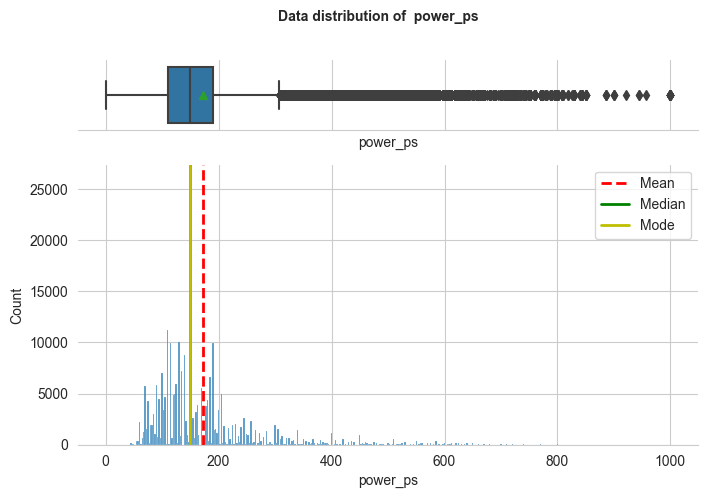

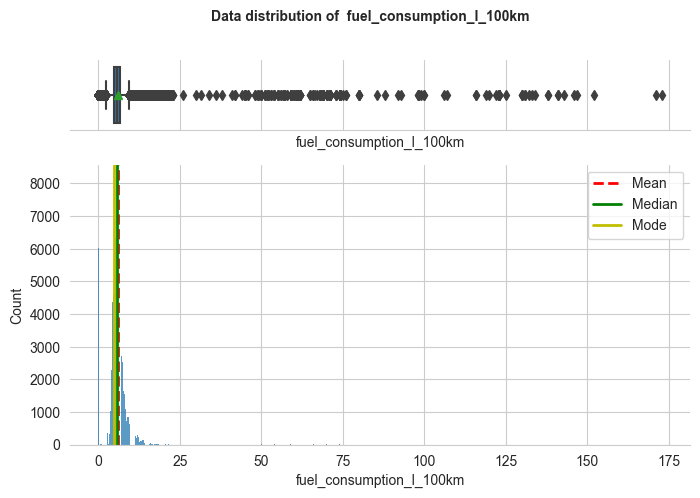

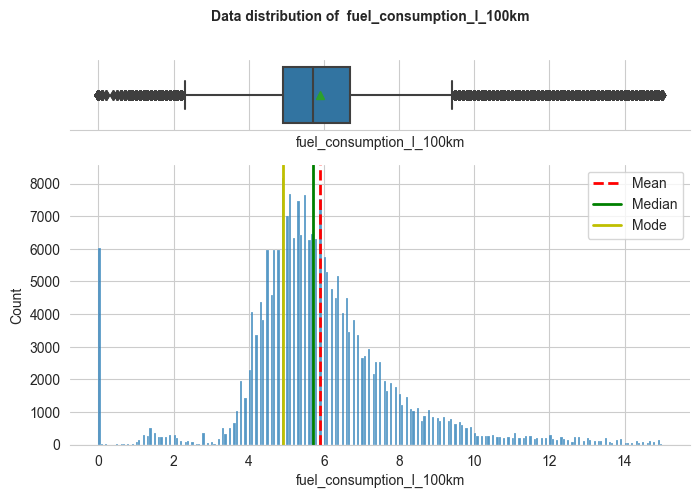

In [124]:
plt.show()

In [125]:
df.describe()

,ID,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,250880.000000,250880.000000,2.508800e+05,250752.000000,250752.000000,228414.000000,213063.000000,2.508180e+05
mean,125523.627212,2016.263166,2.613753e+04,126.221115,171.693618,5.883928,142.374123,8.536867e+04
std,72482.025442,5.463043,3.698795e+04,72.018901,97.890860,2.072506,60.872477,7.872133e+04
min,0.000000,1995.000000,1.200000e+02,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,62752.750000,2013.000000,1.199000e+04,82.000000,111.000000,4.900000,115.000000,2.495000e+04
50%,125513.500000,2018.000000,1.989000e+04,110.000000,150.000000,5.700000,135.000000,6.751500e+04
75%,188286.250000,2020.000000,2.995000e+04,140.000000,190.000000,6.700000,163.000000,1.265385e+05
max,251078.000000,2023.000000,5.890500e+06,735.000000,999.000000,15.000000,999.000000,3.800000e+06


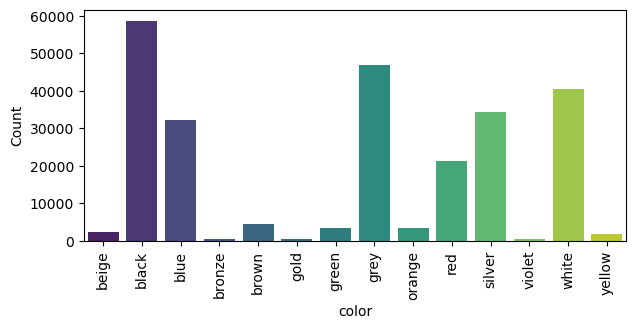

In [26]:
## More visualizations to come
plt.figure(figsize=(7,3))
df_color_count=df.groupby('color')['color'].count().reset_index(name='Count')
sns.barplot(x= df_color_count['color'],y=df_color_count['Count'],palette='viridis')
plt.xticks(rotation=90)
plt.show()

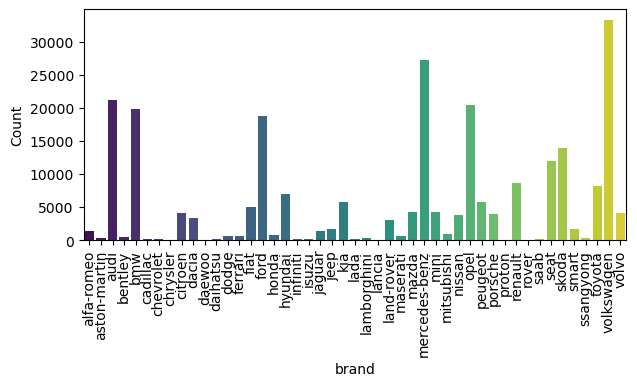

In [27]:
plt.figure(figsize=(7,3))
df_brand_count=df.groupby('brand')['brand'].count().reset_index(name='Count')
sns.barplot(x= df_brand_count['brand'],y=df_brand_count['Count'],palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [73]:
df.describe()

,ID,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,250880.000000,250880.000000,2.508800e+05,250752.000000,250752.000000,228414.000000,213063.000000,2.508180e+05
mean,125523.627212,2016.263166,2.613753e+04,126.221115,171.693618,5.962891,142.374123,8.536867e+04
std,72482.025442,5.463043,3.698795e+04,72.018901,97.890860,3.098687,60.872477,7.872133e+04
min,0.000000,1995.000000,1.200000e+02,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,62752.750000,2013.000000,1.199000e+04,82.000000,111.000000,4.900000,115.000000,2.495000e+04
50%,125513.500000,2018.000000,1.989000e+04,110.000000,150.000000,5.700000,135.000000,6.751500e+04
75%,188286.250000,2020.000000,2.995000e+04,140.000000,190.000000,6.700000,163.000000,1.265385e+05
max,251078.000000,2023.000000,5.890500e+06,735.000000,999.000000,173.000000,999.000000,3.800000e+06


,ID,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
23048,23048,bentley,Bentley Continental GT,brown,08/2016,2016,109999,434.0,590.0,Automatic,Petrol,141.0,327.0,41500.0,Coupe W12 Niam Wifi
29079,29079,bmw,BMW 650,grey,10/2011,2011,17500,300.0,408.0,Automatic,Petrol,99.0,249.0,200000.0,Coupe 650i Leder Xenon Head Up Pano 360 Kamera
41031,41031,bmw,BMW X1,white,07/2020,2020,33000,162.0,220.0,Automatic,Other,59.0,51.0,23000.0,X1 XDrive 25e Sport Line
42248,42248,bmw,BMW 330,grey,01/2022,2022,51300,215.0,292.0,Automatic,Other,60.0,56.0,8300.0,330e Touring xDrive*M-Paket*Laser*PaDa*Top
42410,42410,bmw,BMW X7,black,09/2022,2022,111889,250.0,340.0,Automatic,Diesel,66.4,167.0,11100.0,xDrive40d M Sport DrivePro NightVision SkyLo.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250171,250171,volvo,Volvo XC40,white,06/2020,2020,39830,192.0,261.0,Automatic,Hybrid,51.0,41.0,31650.0,T5 Recharge DKG R-Design *ACC * 360°-Kam.*
250356,250356,volvo,Volvo XC40,red,04/2021,2021,38830,192.0,261.0,Automatic,Hybrid,51.0,41.0,43550.0,T5 Recharge DKG R-Design *AHK * 360°-Kamera*
250568,250568,volvo,Volvo XC40,white,11/2021,2021,45780,192.0,261.0,Automatic,Hybrid,51.0,41.0,18806.0,T5 Recharge DKG RDesign
250909,250909,volvo,Volvo XC60,white,10/2022,2022,64990,257.0,349.0,Automatic,Hybrid,92.0,75.0,19000.0,T6 Recharge AWD Plus Dark +el.AHK+PANO+ SHD/LED


In [78]:
df[df['model']== 'MINI Cooper S']

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
129248,129248,mini,MINI Cooper S,silver,11/2004,2004,4200,125,170,Manual,Petrol,"8,6 l/100 km",207 g/km,160000.0,Mini Cooper S*Klima*Alu*E-SD
129249,129249,mini,MINI Cooper S,silver,07/2004,2004,3550,125,170,Manual,Petrol,"8,6 l/100 km",- (g/km),207000.0,Mini Cooper S
129250,129250,mini,MINI Cooper S,silver,09/2004,2004,4750,125,170,Manual,Petrol,"8,6 l/100 km",- (g/km),231000.0,Mini Cooper
129307,129307,mini,MINI Cooper S,black,01/2008,2008,8200,128,174,Manual,Petrol,"7,1 l/100 km",165 g/km,207000.0,Chili
129309,129309,mini,MINI Cooper S,black,05/2008,2008,9450,128,174,Manual,Petrol,7 l/100 km,164 g/km,154000.0,One Pepper*Panoramadach*Klima*Sitzheiz.*Metallic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133517,133517,mini,MINI Cooper S,black,03/2023,2023,32995,131,178,Automatic,Petrol,"5,3 l/100 km",121 g/km,4985.0,John Cooper Works Tr Steptronic Navi DSG Leder...
133519,133519,mini,MINI Cooper S,black,03/2023,2023,40900,131,178,Automatic,Petrol,"5,9 l/100 km",134 g/km,2496.0,John Cooper Works Tr Steptronic Navi DSG Leder...
133531,133531,mini,MINI Cooper S,white,05/2023,2023,47049,131,178,Automatic,Petrol,"5,6 l/100 km",128 g/km,2001.0,Bluetooth Head Up Display Navi LED Klima
133533,133533,mini,MINI Cooper S,white,03/2023,2023,36350,131,178,Automatic,Petrol,6 l/100 km,137 g/km,5096.0,JCW Trim LED Navi PDC Kamera Leder


## Data Preparation
### Missing data

In [28]:
for i in df.columns:
    if  df[i].isna().sum()!=0:
        print('{} column has {} missing values. Data type is {}'.format(i, df[i].isna().sum(), df[i].isna().sum()/len(df)*100))

color column has 166 missing values. Data type is 0.06616709183673469
power_kw column has 128 missing values. Data type is 0.05102040816326531
power_ps column has 128 missing values. Data type is 0.05102040816326531
fuel_consumption_l_100km column has 27965 missing values. Data type is 11.146763392857142
fuel_consumption_g_km column has 37817 missing values. Data type is 15.07374043367347
mileage_in_km column has 62 missing values. Data type is 0.02471301020408163


In [29]:
# df['fuel_consumption_l_100km'] = df.apply(
#         lambda row: float(0) if pd.isnull(row['fuel_consumption_l_100km']) & \
#         ((row['fuel_type'] == 'Electric')  or \
#          (row['fuel_type'] == 'Hydrogen')  or \
#          (row['fuel_type'] == 'Ethanol')) else row['fuel_consumption_l_100km'],
#     axis = 1)

In [31]:
df['color'].fillna(df['color'].mode()[0], inplace=True)
df.color.unique()

array(['red', 'black', 'silver', 'grey', 'white', 'beige', 'blue',
       'green', 'yellow', 'gold', 'brown', 'bronze', 'violet', 'orange'],
      dtype=object)

In [32]:
df['power_kw'].fillna(df.groupby('model')['power_kw'].transform('mean'), inplace=True)
df['power_ps'].fillna(df.groupby('model')['power_ps'].transform('mean'), inplace=True)

In [33]:
#all rolls with NA
#df= df.dropna(subset=['fuel_consumption_l_100km','fuel_consumption_g_km','color','power_kw','power_ps','mileage_in_km',])
df.isna().sum()

ID                              0
brand                           0
model                           0
color                           0
registration_date               0
year                            0
price_in_euro                   0
power_kw                        1
power_ps                        1
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    27965
fuel_consumption_g_km       37817
mileage_in_km                  62
offer_description               0
dtype: int64

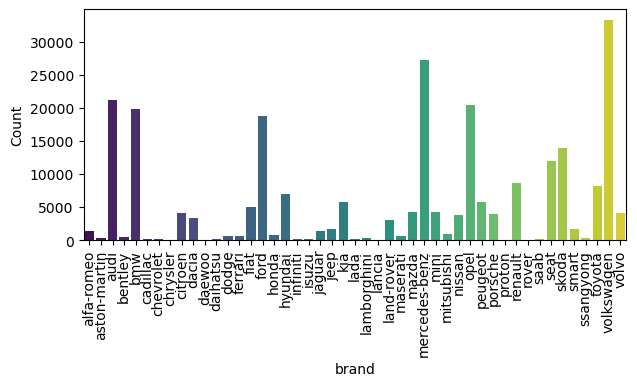

In [32]:
plt.figure(figsize=(7,3))
df_brand_count2=df.groupby('brand')['brand'].count().reset_index(name='Count')
sns.barplot(x= df_brand_count['brand'],y=df_brand_count['Count'],palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [33]:
brand_count=pd.merge(df_brand_count,df_brand_count2, on='brand')
brand_count['difference_xy']=brand_count['Count_x']-brand_count['Count_y']
brand_count

,brand,Count_x,Count_y,difference_xy
0,alfa-romeo,1437,1180,257
1,aston-martin,277,204,73
2,audi,21152,16422,4730
3,bentley,541,375,166
4,bmw,19797,14354,5443
5,cadillac,157,104,53
6,chevrolet,191,93,98
7,chrysler,32,18,14
8,citroen,4081,3238,843
9,dacia,3366,2857,509


In [34]:
#checking for duplicates
dup=df[df.duplicated()]
dup

,ID,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description


*Registration Date* - Dropping this column since it contains same values as the Year column

In [17]:
df.drop(columns = 'registration_date',inplace = True)

In [39]:
information=df['offer_description']
information_list=information.to_list()
information_list

['2.0 V6 TB',
 '2.0 16V Twin Spark L',
 '2.0 16V Twin Spark',
 'Quadrifoglio',
 '(3.0) V6 Super',
 '|HU:neu|Klimaanlage|Youngtimer|',
 '2.0 T.Spark L *Klima *2.Hand *Zahnriemen',
 '3.0 V6 L',
 '2.0 spider',
 '3.0 V6 24v',
 '2.0 V6 TB',
 '2.0 16V T.Spark L',
 '2.0 16V T.Spark 39.000km',
 '2.0 16V Twin Spark',
 '3.0 V6 24V',
 '2.0 16V Twin Spark L  SPORTKIT  GTV  17" ALU',
 '1.8 Twin Spark',
 '2.0 T.Spark L',
 '1.8 T.Spark CABRIO',
 '2.5 V6 24V ARESE / wenig KM / TÜV',
 '2.0 Twin Spark',
 '2.0 T.Spark',
 '1.6 16V Twin Spark',
 '1.8 Twin Spark',
 '2.0 Twin Spark L',
 '16V 1,8 T.Spark',
 '1.6 Twin Spark',
 '2.0 16V Twin Spark',
 '2.0 Twin Spark L',
 '3.0 12v Lusso capote elettrica',
 '1.8 Twin Spark*Pininfarina*Klima*CD*',
 '3.0 V6 L',
 '2.0 Twin Spark',
 '2.0 T.Spark Selespeed',
 '2.0 T.Spark Selespeed',
 '1.6 Twin Spark ECO Distinctive',
 'GTA 3.2 V6 KLIMA LM',
 'Sportwagon 2.5 V6 24V',
 '2.0 Twin Spark Selespeed Distinctive',
 '1.6 T.Spark / Klima/ Tempomat/ BC/ TOP',
 '2.0 16V T.Spark 

In [41]:
df['Engine Type'] = df['offer_description'].str.extract(r'(\d+\.\d+|\d+\.\d+ [Vv])|([A-Za-z]+)')
df['Engine Type'] = df['Car'].str.extract(r'(\d+\.\d+ [Vv]|[\d\.]+|[A-Za-z]+)')


ValueError: Cannot set a DataFrame with multiple columns to the single column Engine Type